<a href="https://colab.research.google.com/github/NikhileshSarangpure/Tata-Motor-Stock-Forcasting/blob/main/Tata_Motor_Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/content/Tata.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,02-01-2019,170.600006,171.750000,168.000000,168.550003,168.550003,13410104
1,03-01-2019,169.000000,170.149994,165.100006,166.050003,166.050003,9321842
2,04-01-2019,169.000000,171.949997,168.500000,170.949997,170.949997,17650435
3,07-01-2019,173.199997,178.199997,173.199997,175.350006,175.350006,21438351
4,08-01-2019,176.100006,180.500000,176.100006,179.949997,179.949997,20128985


In [ ]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
836,24-05-2022,423.899994,427.500000,416.000000,425.750000,425.750000,14525617
837,25-05-2022,428.450012,429.000000,413.450012,417.000000,417.000000,13540006
838,26-05-2022,422.000000,422.649994,405.000000,420.649994,420.649994,17712299
839,27-05-2022,426.049988,433.250000,425.200012,429.600006,429.600006,16867431
840,30-05-2022,437.000000,445.200012,436.000000,442.399994,442.399994,18500266


In [ ]:
df1=df.reset_index()['Adj Close']

In [ ]:
df1

0      168.550003
1      166.050003
2      170.949997
3      175.350006
4      179.949997
          ...    
836    425.750000
837    417.000000
838    420.649994
839    429.600006
840    442.399994
Name: Adj Close, Length: 841, dtype: float64

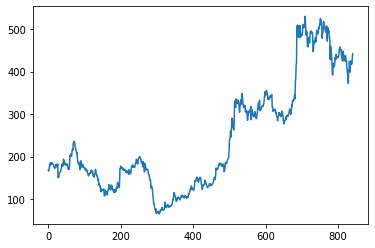

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
print(df1)

[[0.22211465]
 [0.21673657]
 [0.22727759]
 [0.23674303]
 [0.24663868]
 [0.25330751]
 [0.25911583]
 [0.24739162]
 [0.25190919]
 [0.25825535]
 [0.25847045]
 [0.25728727]
 [0.25384531]
 [0.24997309]
 [0.2485748 ]
 [0.24728405]
 [0.23685057]
 [0.23222543]
 [0.23018177]
 [0.23297838]
 [0.23512961]
 [0.24932772]
 [0.25029576]
 [0.24728405]
 [0.23771108]
 [0.2435194 ]
 [0.25287727]
 [0.18371516]
 [0.18791005]
 [0.18608152]
 [0.20339894]
 [0.20727113]
 [0.20996017]
 [0.21178873]
 [0.21404753]
 [0.22458855]
 [0.23448423]
 [0.23760351]
 [0.252447  ]
 [0.24104549]
 [0.2412606 ]
 [0.24739162]
 [0.27697105]
 [0.26567709]
 [0.2667527 ]
 [0.24932772]
 [0.25072604]
 [0.25707216]
 [0.25040333]
 [0.2457782 ]
 [0.24674624]
 [0.25158652]
 [0.25287727]
 [0.24717648]
 [0.23685057]
 [0.22803054]
 [0.23190276]
 [0.22491126]
 [0.22641711]
 [0.26255781]
 [0.296117  ]
 [0.29267505]
 [0.30300094]
 [0.3008497 ]
 [0.29095406]
 [0.30246313]
 [0.32429815]
 [0.32892328]
 [0.32408301]
 [0.35807247]
 [0.35538343]
 [0.36

In [ ]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.7)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size

(588, 253)

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:

# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(487, 100)
(487,)


(None, None)

In [ ]:

print(X_test.shape), print(ytest.shape)

(152, 100)
(152,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_7 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
8/8 [==============================] - 8s 396ms/step - loss: 0.0263 - val_loss: 0.0233
Epoch 2/100
8/8 [==============================] - 2s 193ms/step - loss: 0.0075 - val_loss: 0.0838
Epoch 3/100
8/8 [==============================] - 2s 195ms/step - loss: 0.0045 - val_loss: 0.0071
Epoch 4/100
8/8 [==============================] - 2s 199ms/step - loss: 0.0030 - val_loss: 0.0081
Epoch 5/100
8/8 [==============================] - 2s 199ms/step - loss: 0.0024 - val_loss: 0.0087
Epoch 6/100
8/8 [==============================] - 2s 201ms/step - loss: 0.0021 - val_loss: 0.0060
Epoch 7/100
8/8 [==============================] - 2s 203ms/step - loss: 0.0019 - val_loss: 0.0059
Epoch 8/100
8/8 [==============================] - 2s 212ms/step - loss: 0.0018 - val_loss: 0.0051
Epoch 9/100
8/8 [==============================] - 2s 197ms/step - loss: 0.0016 - val_loss: 0.0054
Epoch 10/100
8/8 [==============================] - 2s 198ms/step - loss: 0.0015 - val_loss: 0.0045
Epoch 11/

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.8.2'

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:

##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

180.01353498670457

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

461.31794480729144

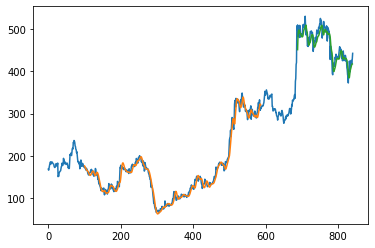

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

253

In [ ]:
x_input=test_data[153:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

In [ ]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<60):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

[0.76940525]
101
1 day input [0.91276752 0.9130902  0.9111541  0.91491876 0.9430999  0.93793689
 0.95073675 0.96084756 0.9564375  0.98892111 0.95837359 0.97999344
 0.96891468 0.93912011 0.88878131 0.91481116 0.92309341 0.92933197
 0.97332468 0.94439059 0.94890819 0.94482086 0.93643107 0.92352368
 0.91954389 0.93782936 0.95116702 0.93266642 0.87372269 0.94374525
 0.93180594 0.93503278 0.92040437 0.92320101 0.88835103 0.885662
 0.78014412 0.84855325 0.83629121 0.8224158  0.79982787 0.75712591
 0.70710978 0.70226951 0.73270942 0.76218132 0.75906201 0.74518661
 0.74938147 0.77358282 0.79272877 0.78014412 0.80681937 0.79703123
 0.79143808 0.78907171 0.79036247 0.7925137  0.79670856 0.79262123
 0.80854033 0.82058724 0.84489613 0.84080881 0.82650313 0.83198874
 0.83198874 0.80240931 0.78681288 0.79272877 0.77369042 0.80724958
 0.82338382 0.80359253 0.77412063 0.79509514 0.78509192 0.79756904
 0.80090349 0.79068514 0.77057111 0.77659453 0.73841017 0.72851456
 0.70226951 0.69452506 0.66042803 0

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,161)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(df1)

841

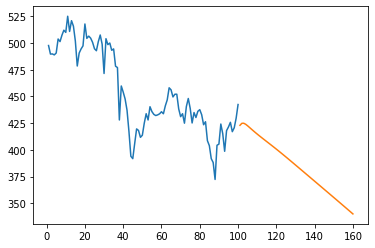

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[741:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

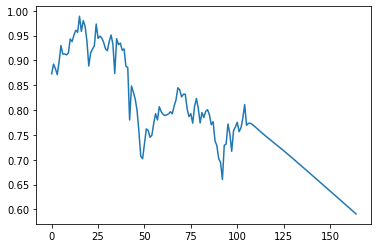

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[736:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

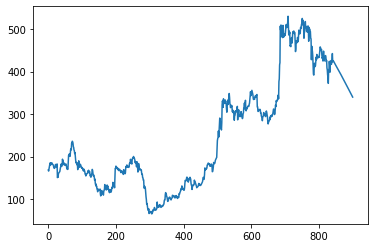

In [ ]:
plt.plot(df3)